# Тестирование работы нейросети считывания цифр на Python на основе набора MNIST
Написанная нейросеть считывает набор тренировочных данных из 100 элементов MNIST. На основе тренировочного набора производится считывание 10 символов и сравнивается с результатом работы нейросети

Обновление весов высчитывается по формуле $ ΔW = a * E * Сигмоида(О) (1 - Сигмоида(O)) * O^T$



### Описание
Нейросеть состоит из 784 входных узлов (по одному на каждый пиксель), 100 скрытых узлов и 10 выходных узлов (по одному на цифру).

Код:

In [59]:
import numpy
import scipy
import matplotlib.pyplot


class NeuralNetwork:
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningGrate):
        # Задать количество узлов в слоях
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes

        # Коэффицент обучения
        self.lr = learningGrate

        # Матрицы весов
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)

        # Сигмоида
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    def train(self, inputs_list, targets_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)

        # Поиск ошибки
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot((output_errors * final_outputs *
                                         (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *
                                         (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass

    def query(self, inputs_list):
        # Преобразовать входные значения в массив
        inputs = numpy.array(inputs_list, ndmin=2).T

        # Расчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Расчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # Расчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Расчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

Укажем количество узлов

In [60]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

Существует коллекция изображений рукописных цифр, используемых исследователями искусственного интеллекта в качестве популярного набора для тестирования идей и алгоритмов.

Этим тестовым набором является база данных рукописных цифр
под названием “MNIST”

1. Первое значение — это маркер, т.е. фактическая цифра, например “7” или “9” которую должен представлять данный рукописный экземпляр. Это ответ, правильному получению которого должна обучиться нейронная сеть.
2. Последующие значения, разделенные запятыми, — это значения пикселей рукописной цифры. Пиксельный массив имеет размерность 28x28, поэтому за каждым маркером следуют 784 пикселя. 

Считываем 10 тестовых значений MNIST

In [61]:
test_data_file = open("mnist_test_10.csv", 'r')
data_list = test_data_file.readlines()
test_data_file.close()

Первый символ в каждой строке указывает какой символ зашифрован

In [62]:
all_values = data_list[1].split(',')
print(all_values[0])

2


Выведем весь набор значений, чтобы просмотреть как выглядит цифра в программе

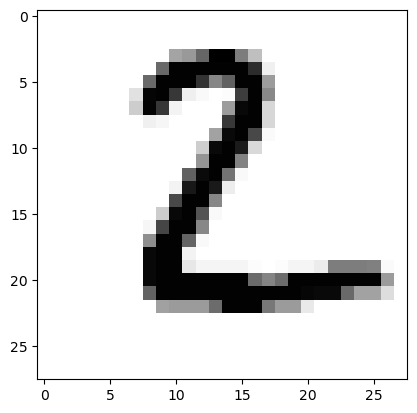

In [63]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

Обучим нейросеть на основе 100 элементов набора MNIST

In [64]:
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

мы создаем пустой список scorecard, который будет
служить нам журналом оценок работы сети, обновляемым после обработки каждой записи.

Данная переменная будет служить счетчиком правильных значений

In [65]:
scorecard = []

for record in data_list:
    # получить список значений из записи, используя символы
    # запятой (*,1) в качестве разделителей
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    print(correct_label, "истинный маркер")
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = numpy.argmax(outputs)
    print(label, "ответ сети")
    # присоединить оценку ответа сети к концу списка
    if (label == correct_label):
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети присоединить
        # к списку значение 0
        scorecard.append(0)
        pass
    pass

7 истинный маркер
7 ответ сети
2 истинный маркер
3 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
3 ответ сети
5 истинный маркер
4 ответ сети
9 истинный маркер
7 ответ сети


In [66]:
scorecard

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]

Таким образом видно что нейросеть на основе 100 тренировчных данных смогла определить правильно 6 из 10 символов, что составляет 60%